In [11]:
# Problem Set 2, due April 20 at 11:59am (i.e., noon).

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on Canvas). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from Canvas. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [12]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn import datasets, linear_model

datafilepath = 'progresa_sample.csv'
progresaFrame = pd.read_csv(datafilepath)

# drop rows with nulls
progresaFrame = progresaFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# create summary table
progresaFrameSummary = progresaFrame.describe()[1:3]
progresaFrameSummary = progresaFrameSummary.drop(progresaFrameSummary.columns[[0, 15, 16]], axis=1)  # df.columns is zero-based pd.Index
progresaFrameSummarySorted = progresaFrameSummary.sort_index(axis=1, ascending=True)
progresaFrameSummarySorted

,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,sc,sc97,sex,welfare_index
mean,11.141369,148.747707,2.346990,7.224666,4.089494,3.762656,44.262224,2.853908,0.927744,592.782484,0.291305,103.595249,0.821102,0.839263,0.513572,690.196267
std,2.995374,77.134043,2.111281,2.329421,2.447608,2.449568,11.457772,2.655106,0.258914,791.378223,0.454367,42.025512,0.383270,0.367291,0.499819,139.489218


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows:

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [13]:
# your code here

# get data for poor people only
progresaFrame = progresaFrame[progresaFrame['poor'] == 'pobre']

# getting the progresa data for the year 97 only
progresaFrame97 = progresaFrame[progresaFrame['year'] == 97]

# splitting the treatment group
treatment97 = progresaFrame97[progresaFrame97['progresa'] != '0']
treatment97 = treatment97.drop(treatment97.columns[[0, 9, 10, 17, 18]], axis=1)
#treatment97 = treatment97.sort_index(axis=1, ascending=True)

# splitting the control group
control97 = progresaFrame97[progresaFrame97['progresa'] == '0']
control97 = control97.drop(control97.columns[[0, 9, 10, 17, 18]], axis=1)
#control97 = control97.sort_index(axis=1, ascending=True)

# print(treatment97)
t, p = stats.ttest_ind(treatment97['dist_sec'], control97['dist_sec'])

# control97.info()

progresaSummaryFrame97 = progresaFrame.copy(deep=True)
progresaSummaryFrame97 = progresaSummaryFrame97.drop(progresaSummaryFrame97.columns[[0, 9, 10, 17, 18]], axis=1)
baselineDifferences = pd.DataFrame()
baselineDifferences['Variable name'] = progresaSummaryFrame97.columns.values

baselineDifferences['Average value (Treatment villages)'] = treatment97.mean().values
baselineDifferences['Average value (Control villages)'] = control97.mean().values
baselineDifferences['Difference (Treat - Control)'] = baselineDifferences['Average value (Treatment villages)'] - baselineDifferences['Average value (Control villages)']
t, p = stats.ttest_ind(treatment97.dropna(axis=0), control97.dropna(axis=0))
baselineDifferences['p-value'] = p.tolist()

baselineDifferences

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
1,indig,0.316744,0.325306,-0.008562,1.183760e-01
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,sc,0.822697,0.815066,0.007631,9.117959e-02
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

*Discuss your results here*
A.
There are statistical significant differences between treatment and control villagese as baseline in the welfare_index, sex, sc97, sc, min_dist, indig, and hosex variables.

B.
It matters if there are differences at baseline because that means that assignment between control and treatment groups may not have been completely random, and the variables which have statistically significant differences at the baseline cannot be properly analyzed for changes as they start out with significantly different values.

C.
This means that the variables which have statistically significant differences at the start of the experiment will taint our analysis of the impact of the treatment, and as such, the analysis must be taken with a grain of salt. Also, when reporting the results, the differences should be made known so that misinformation does not get spread.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

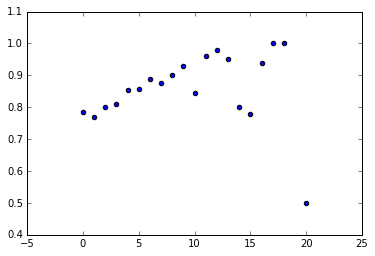

In [14]:
# Your code here

progresaFrame97
progresaFrame97.hohedu.value_counts()
enrollmentByHHE97 = progresaFrame97.groupby('hohedu')

meanEnrollmentByHHE97 = enrollmentByHHE97.aggregate(np.mean)


plt.scatter(meanEnrollmentByHHE97.index, meanEnrollmentByHHE97['sc'])
plt.show()

*Discuss your results here*

I notice that as the level of household head education increases, so does the mean enrollment rate, except for at the 20 year mark where there is a sharp drop. This is likely due to small sample size at that level of education.

### 1.5 Graphical exploration, part 2

Create a histogram of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

0.819799596591
0.83479258268


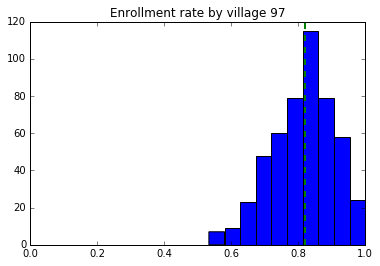

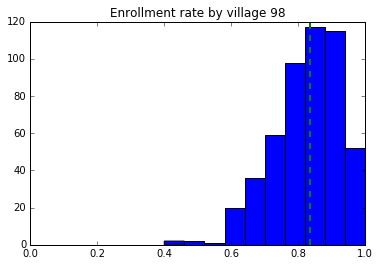

0.819799596591
0.83479258268
0.0149929860896
2.4897469039e-06


In [15]:
# Your code here
enrollmentByVillage97 = progresaFrame97.groupby('village')
meanEnrollmentByVillage97 = enrollmentByVillage97.aggregate(np.mean)

progresaFrame98 = progresaFrame[progresaFrame['year'] == 98]

# splitting the treatment group
treatment98 = progresaFrame98[progresaFrame98['progresa'] != '0']
treatment98 = treatment98.drop(treatment98.columns[[0, 9, 10, 15, 16]], axis=1)
treatment98 = treatment98.sort_index(axis=1, ascending=True)

enrollmentByVillage98 = progresaFrame98.groupby('village')

meanEnrollmentByVillage98 = enrollmentByVillage98.aggregate(np.mean)

print(progresaFrame97.sc.mean())
print(progresaFrame98.sc.mean())

plt.hist(meanEnrollmentByVillage97.sc)
plt.axvline(progresaFrame97.sc.mean(), color='g', linestyle='dashed', linewidth=2)
plt.title('Enrollment rate by village 97')
plt.xlim([0,1])
plt.show()
#plt.hist(meanEnrollmentByHHE98.index, weights=meanEnrollmentByHHE98.sc)
plt.hist(meanEnrollmentByVillage98.sc)
plt.axvline(progresaFrame98.sc.mean(), color='g', linestyle='dashed', linewidth=2)
plt.title('Enrollment rate by village 98')
plt.xlim([0,1])
plt.show()

print(progresaFrame97.sc.mean())
print(progresaFrame98.sc.mean())
difference = progresaFrame98.sc.mean() - progresaFrame97.sc.mean()
print(difference)
t, p = stats.ttest_ind(progresaFrame97.sc, progresaFrame98.sc)
print(p)

*Discuss your results here*

There is small increase in average rate of 1.5 percent in enrollment from the years 97 to 98. Due to the small p value, the difference does seem to be statistically significant.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [16]:
# Your code here
control98 = progresaFrame98[progresaFrame98['progresa'] == '0']
treatment98Mean = treatment98.sc.mean()
control98Mean = control98.sc.mean()

print(control98Mean)
print(treatment98Mean)


simpleDifference98 = treatment98Mean - control98Mean
print(simpleDifference98)

t, p = stats.ttest_ind(control98.sc, treatment98.sc)
print(p)

0.810923092512
0.849257030578
0.0383339380665
5.65645560536e-16


*Discuss your results here*

There is an increase of 3.83 percent in the average enrollment rate of poor households in treatment villages from the control villages. Due to the extremely low p value of 5.65645560536e-16, the difference is statistically significant.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. Discuss the following:

* Based on this model, how much did Progresa increase the likelihood of a child enrolling?
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [17]:
# Your code here
#se is a function of progresa
#when treatment is there, it affects the enrollment this much

overfit_mod = smf.ols(formula='sc ~ progresa', data = progresaFrame98)
overfit_result = overfit_mod.fit()
overfit_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           5.66e-16
Time:                        11:57:04   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.004    217.190      0.000         0.804     0.818
progresa[T.basal]     0.0383      0.005      8.102      0.000         0.029     0.048
==============================================================================
Omnibus:                     7487.800   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15756.374
Skew:                          -1.796   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*

The simple diffrence regression states that the treatment of progresa there was an average increase in enrollment of 3.83 percent with a standard error of .5 percent.
The t-test and the simple differences regression gave almost identical values for the effect that the progressa treatment had on enrollment.
Due to the low p value, we can reject the null hypothesis that treatment has no effect.
The counterfactual is that in the absense of the progresa treatment, the enrollment of the progresa treatment and the control set would be the same.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [18]:
# Your code here
overfit_mod = smf.ols(formula='sc ~ progresa + age + dist_sec + sex + hohage + welfare_index + indig', data = progresaFrame98)
overfit_result = overfit_mod.fit()
overfit_result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     1317.
Date:                Fri, 22 Apr 2016   Prob (F-statistic):               0.00
Time:                        11:57:04   Log-Likelihood:                -7254.1
No. Observations:               26155   AIC:                         1.452e+04
Df Residuals:                   26147   BIC:                         1.459e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.5398      0.015    102.277      0.000         1.510     1.569
progresa[T.basal]     0.0354      0.004      8.674      0.000         0.027     0.043
age                  -0.0655      0.001    -91.934      0.000        -0.067    -0.064
dist_sec             -0.0117      0.001    -12.538      0.000        -0.014    -0.010
sex                   0.0304      0.004      7.692      0.000         0.023     0.038
hohage               -0.0006      0.000     -3.055      0.002        -0.001    -0.000
welfare_index      5.246e-05   1.77e-05      2.958      0.003      1.77e-05  8.72e-05
indig                 0.0511      0.004     12.060      0.000         0.043     0.059
==============================================================================
Omnibus:                     3063.544   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4255.788
Skew:                          -0.975   Prob(JB):                         0.00
Kurtosis:                       3.315   Cond. No.                     5.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Discuss your results here*

After factoring in age, distance to a secondary school, gender, education of household head, welfare index, and indigenous as control variables, the effect the progressa treatment was measured at 3.54 percent with an standard error of .4 percent. had on enrollment changed from 3.83 percent to 3.54 percent, a change of -0.29 percent. While there is a change, it isn't very drastic, and the overall range of values of the effect the progressa treatment had on enrollment stayed about the same. 

The addition of the controls changed the standard error of the progressa treatment from .005 t0 .004. While there is a decrease, it isn't significant. It makes sense that the error would decrease as more control variables are added into the regression.

The variables I included as controls make sense to me as I would intuitively expect them to make a difference in the chance a child will be enrolled. I hence expect the multiple regression to provide a more accurate value for the progresa treatment effect. The error term is also slightly lower. As a result, I would interpret the results between the two regressions by choosing the resullt from the second regression, 3.54 percent, as the difference in enrollment the progressa treatment has.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 

In [19]:
# Your code here
differenceInDifference = (treatment98.sc.mean() - control98.sc.mean()) - (treatment97.sc.mean() - control97.sc.mean())
differenceInDifference

0.030702973230652075

*Discuss your results here*

My estimate of the impact of the progresa treatment on enrollment is that it increases enrollment by 3.07 percent. This value falls between what I got in the simple difference regression and the multiple difference regresssion.

The counterfactual assumption underlying this estimate is that in the absense of treatment, the average change in enrollment in the treatment group between 98 and 97 would be the same as the average change in enrollment in the control group between 98 and 97.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [20]:
# Your code here
# dummy variable
progresaFrameDummy = progresaFrame.copy(deep=True)
progresaFrameDummy['period'] = progresaFrameDummy['year'].apply(str)

overfit_mod = smf.ols(formula='sc ~ progresa + period + progresa * period + age + dist_sec + sex + hohage + indig', data = progresaFrameDummy)
overfit_result = overfit_mod.fit()
overfit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2695.
Date:                Fri, 22 Apr 2016   Prob (F-statistic):               0.00
Time:                        11:57:05   Log-Likelihood:                -16314.
No. Observations:               56893   AIC:                         3.265e+04
Df Residuals:                   56884   BIC:                         3.273e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          1.5266      0.008    200.405      0.000         1.512     1.542
progresa[T.basal]                  0.0047      0.004      1.247      0.213        -0.003     0.012
period[T.98]                       0.0329      0.004      7.444      0.000         0.024     0.042
progresa[T.basal]:period[T.98]     0.0305      0.006      5.452      0.000         0.020     0.041
age                               -0.0657      0.000   -141.487      0.000        -0.067    -0.065
dist_sec                          -0.0113      0.001    -17.828      0.000        -0.013    -0.010
sex                                0.0334      0.003     12.364      0.000         0.028     0.039
hohage                            -0.0002      0.000     -1.755      0.079        -0.000  2.48e-05
indig                              0.0518      0.003     17.875      0.000         0.046     0.058
==============================================================================
Omnibus:                     5613.115   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7454.903
Skew:                          -0.883   Prob(JB):                         0.00
Kurtosis:                       3.151   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Discuss your results here*

The results state that

Of poor households in Mexico, those in the progresa treatment group are estimated with a .47 (with a standard error of .4) percent higher than those not in the progresa treatment group of being enrolled.

Of poor households in Mexico, those in the year 98 are estimated with a 3.3 (with a standard error of .4) percent higher than those in the year 97 of being enrolled.

Of poor households in Mexico, those in the progresa treatment group are estimated with a 3.05 (with a standard error of .6) percent higher in the year 98 than those in the progresa treatment group in the year 97.

These results estimate that the progresa treatment had an estimated impact of increasing the enrollment rate by 3.05 (with a standard error of .6) percent.

This result is quite different from those calculated using a simple difference method, which provided an estimate of 3.83 percent. Since the Difference-in-Difference regression method takes into account the change in enrollment that may have taken place simply due to the change in the year and the change between the treatment and control group, the overall calculated error term is lower and we recieve a more accurate estimate of the impact the progresa treatment had on enrollment.

This result (3.05 percent) is pretty close to the difference-in-difference estimates from 2.4 (3.07 percent) above. The change in the values are due to the estimate in 2.4 being calculated using average values while this result is calculated using ordinary least squares regression.

The counterfactual assumption underlying this estimate is that in the absense of treatment, the average change in enrollment in the treatment group between 98 and 97 would be the same as the average change in enrollment in the control group between 98 and 97.

### 2.6 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

*Discuss your results here*

Based on all the analysis I have undertaken to date, I do believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico. I believe that it has increased the enrollment rates of poor households in Mexico.

I would calculate the triple difference on progresa treatment, year (97 vs 98), and poor vs non-poor.

Another way I might analyze these data to further investigate the causal impact of Progresa on enrollment is by using the non-poor data in my analysis as well to calculate a triple difference between the year, treatment, and poor variables and the impact they have on enrollment. 

The counterfactual assumption would be that in the absense of treatment, the change in enrollment rates of the treatment and control group of poor people in Mexico between 97 and 98 would be the same. Also, in the absense of treatment the change in enrollment rates of the treatment and control group of non-poor people in Mexico between 97 and 98 would be the same. We also have to assume that there is no other factor in the non-poor group that affects the enrollment rates.